#  Conservatory Project-1

#  Project Title: Effects of COVID-19 on Retail Sales 

In [6]:
%matplotlib inline

- **Import Dependencies**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats as st
from scipy.stats import linregress

## **Section 1: COVID-19 Confirmed Cases**

- Read data in dataframe: **cov_19**
- Inspect first 5 rows of **cov_19**

In [8]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\us_confirmed.csv" 
cov_19 = pd.read_csv(file)
cov_19.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1664,1673,1690,1691,1714,1715,1738,1757,1764,1773
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,5033,5047,5061,5087,5124,5141,5165,5456,5477,5526
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,824,830,835,838,848,851,857,873,882,885
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,619,628,632,636,635,638,642,652,654,656
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1527,1542,1551,1560,1573,1580,1594,1608,1611,1617


- Inspect column labels: **cov_19_cols**

In [9]:
cov_19_cols = cov_19.columns
cov_19_cols

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '9/18/20', '9/19/20', '9/20/20', '9/21/20', '9/22/20', '9/23/20',
       '9/24/20', '9/25/20', '9/26/20', '9/27/20'],
      dtype='object', length=261)

- Inspect data types of **cov_19**

In [10]:
cov_19.dtypes

UID          int64
iso2        object
iso3        object
code3        int64
FIPS       float64
            ...   
9/23/20      int64
9/24/20      int64
9/25/20      int64
9/26/20      int64
9/27/20      int64
Length: 261, dtype: object

- Drop columns not necessary for analysis: **cov_19_dropped**

In [11]:
cov_19_dropped = cov_19.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_',\
                              'Combined_Key'], axis = 1)
cov_19_dropped.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,1664,1673,1690,1691,1714,1715,1738,1757,1764,1773
1,Alabama,0,0,0,0,0,0,0,0,0,...,5033,5047,5061,5087,5124,5141,5165,5456,5477,5526
2,Alabama,0,0,0,0,0,0,0,0,0,...,824,830,835,838,848,851,857,873,882,885
3,Alabama,0,0,0,0,0,0,0,0,0,...,619,628,632,636,635,638,642,652,654,656
4,Alabama,0,0,0,0,0,0,0,0,0,...,1527,1542,1551,1560,1573,1580,1594,1608,1611,1617


- Group by *Province_State*: **state_cov_group**
- Sum values in rows (axis=0): **state_cov_sum**

In [12]:
state_cov_group = cov_19_dropped.groupby('Province_State')
state_cov_sum = state_cov_group.sum()
state_cov_sum.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,142863,144164,144962,145780,146584,147153,148206,150658,151591,152321
Alaska,0,0,0,0,0,0,0,0,0,0,...,6644,6729,6822,6892,6936,7004,7132,7254,7367,7481
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,212942,213551,214021,214251,214846,215284,215852,216367,216826,217237
Arkansas,0,0,0,0,0,0,0,0,0,0,...,74082,75160,75723,76364,76981,77963,79049,79946,80755,81242


- Extract total new cases by month
- Create **state_cov_cum** from confirmed cases by month

In [13]:
# Columns to add to 'state_cov_sum' = [jan, feb, mar, apr, may, jun, jul, aug]
jan = state_cov_sum.iloc[:, 9:10]
feb = state_cov_sum.iloc[:, 38:39]

mar = state_cov_sum.iloc[:, 69:70]

apr = state_cov_sum.iloc[:, 99:100]

may = state_cov_sum.iloc[:, 130:131]

jun = state_cov_sum.iloc[:, 160:161]

jul = state_cov_sum.iloc[:, 191:192]
aug = state_cov_sum.iloc[:, 222:223]

# Add cumulative cases

state_cov_sum['Jan'] = jan
state_cov_sum['Feb'] = feb
state_cov_sum['Mar'] = mar
state_cov_sum['Apr'] = apr
state_cov_sum['May'] = may
state_cov_sum['Jun'] = jun
state_cov_sum['Jul'] = jul
state_cov_sum['Aug'] = aug
cum_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

state_cov_cum = state_cov_sum[cum_months]
state_cov_cum.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
Province_State,,,,,,,,
Alabama,0,0,987,7088,17952,38045,87723,126058
Alaska,0,0,119,355,459,937,2990,5263
American Samoa,0,0,0,0,0,0,0,0
Arizona,1,1,1289,7655,19936,79228,174010,201835
Arkansas,0,0,523,3281,7253,20777,42511,61224


- Get confirmed cases for each month
- Create **state_ind** from confirmed cases fr each month
- Rename columns

In [14]:
jan_new = state_cov_sum['Jan']
feb_new = state_cov_sum['Feb'] - state_cov_sum['Jan']
mar_new = state_cov_sum['Mar'] - state_cov_sum['Feb']
apr_new = state_cov_sum['Apr'] - state_cov_sum['Mar']
may_new = state_cov_sum['May'] - state_cov_sum['Apr']
jun_new = state_cov_sum['Jun'] - state_cov_sum['May']
jul_new = state_cov_sum['Jul'] - state_cov_sum['Jun']
aug_new = state_cov_sum['Aug'] - state_cov_sum['Jul']

state_cov_sum['Jan_New'] = jan_new
state_cov_sum['Feb_New'] = feb_new
state_cov_sum['Mar_New'] = mar_new
state_cov_sum['Apr_New'] = apr_new
state_cov_sum['May_New'] = may_new
state_cov_sum['Jun_New'] = jun_new
state_cov_sum['Jul_New'] = jul_new
state_cov_sum['Aug_New'] = aug_new
new_ind_cases = ['Jan_New', 'Feb_New', 'Mar_New', 'Apr_New', 'May_New', 'Jun_New', 'Jul_New', 'Aug_New']
state_ind = state_cov_sum[new_ind_cases]
state_ind.head()
state_ind.rename(columns={'Jan_New':'Jan', 'Feb_New':'Feb', 'Mar_New':'Mar', 'Apr_New':'Apr', 'May_New':'May',\
                         'Jun_New':'Jun', 'Jul_New':'Jul', 'Aug_New':'Aug'}, inplace=True)

C:\Users\lenpk\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
state_ind.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug
Province_State,,,,,,,,
Alabama,0,0,987,6101,10864,20093,49678,38335
Alaska,0,0,119,236,104,478,2053,2273
American Samoa,0,0,0,0,0,0,0,0
Arizona,1,0,1288,6366,12281,59292,94782,27825
Arkansas,0,0,523,2758,3972,13524,21734,18713


- Create line plot of COVID-19 total cases by month: **Monthly US Confirmed Cases**

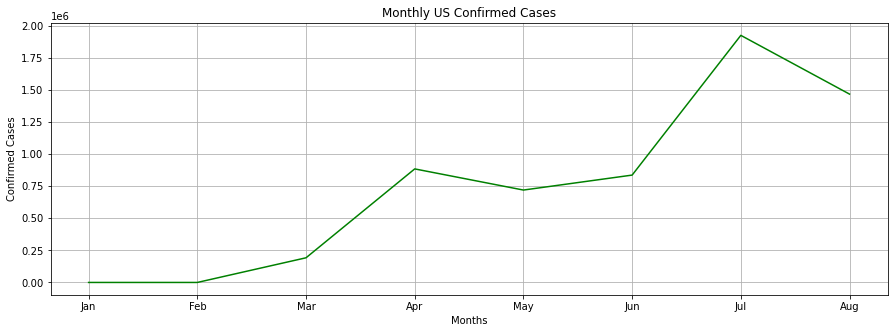

In [16]:
plt.rcParams['figure.figsize'] = [15, 5]
state = state_ind.sum()
# mnth_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
state.plot(color='green')
plt.title('Monthly US Confirmed Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Months')


plt.grid()
plt.savefig('us_confirmed.png')
plt.show()


## Section 2: **Retail Categories Sales 2020-Jan to 2020-Aug**

- Load excel file: **retail_biz**

In [17]:
file_path = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\retail_20_Tabulated.xls"
retail_biz = pd.read_excel(file_path, headers=None)
retail_biz.columns = ['Kind of Business', 'Amount', 'Pct Change 2019']

In [18]:
retail_biz

,Kind of Business,Amount,Pct Change 2019
0,Motor vehicle & parts dealers,801017,-3.4
1,Furniture & home furn. stores,67610,-11.3
2,Electronics & appliance stores,49890,-16.8
3,Building material & garden eq. & supplies de...,289219,11.4
4,Food & beverage stores,566563,12.2
5,Health & personal care stores,236769,0.1
6,Gasoline stations,277960,-16.9
7,Clothing & clothing accessories stores,108616,-34.9
8,"Sporting goods, hobby, musical instrument, & b...",50087,-0.7
9,General merchandise stores,467022,2.2


- Create new labels: **biz_labels**

In [19]:
biz_labels = ['Motor Vehicle & Parts', 'Furniture', 'Appliances', 'Building & Supplies', 'Food & Beverage Stores',\
              'Health & Personal Care', 'Gas Stations', 'Clothing & Accessories', 'Sports & Leisure',\
              'General Merchandise', 'Miscellaneous Stores', 'Nonstore Retailers', 'Food Services & Drinking']
biz_labels = [biz for biz in biz_labels]

- Add values of **biz_labels** in new column: **Category**

In [20]:
retail_biz['Category'] = biz_labels


- Extract columns for analysis: **retail_cat**

In [21]:
retail_cat = retail_biz[['Category', 'Amount', 'Pct Change 2019']]
retail_cat

,Category,Amount,Pct Change 2019
0,Motor Vehicle & Parts,801017,-3.4
1,Furniture,67610,-11.3
2,Appliances,49890,-16.8
3,Building & Supplies,289219,11.4
4,Food & Beverage Stores,566563,12.2
5,Health & Personal Care,236769,0.1
6,Gas Stations,277960,-16.9
7,Clothing & Accessories,108616,-34.9
8,Sports & Leisure,50087,-0.7
9,General Merchandise,467022,2.2


- Inspect columns and data type of **retail_cat**

In [22]:
retail_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         13 non-null     object 
 1   Amount           13 non-null     int64  
 2   Pct Change 2019  13 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 440.0+ bytes


**Statistical Analysis of Retail Sales**

- Summary Statistics

In [23]:
# Summary Statistics
mean_retail_sales = retail_cat['Amount'].mean()
max_retail_sales = retail_cat['Amount'].max()
min_retail_sales = retail_cat['Amount'].min()
std_retail_sales = retail_cat['Amount'].std()

print(f"The mean retail sales is ${round(mean_retail_sales)} Million")
print(f"The max retail sales is ${round(max_retail_sales)} Million")
print(f"The min retail sales is ${round(min_retail_sales)} Million")
print(f"The standard deviation of retail sales is ${round(std_retail_sales)} Million")

The mean retail sales is $307359 Million
The max retail sales is $801017 Million
The min retail sales is $49890 Million
The standard deviation of retail sales is $243882 Million


- Box Plot of Retail Sales

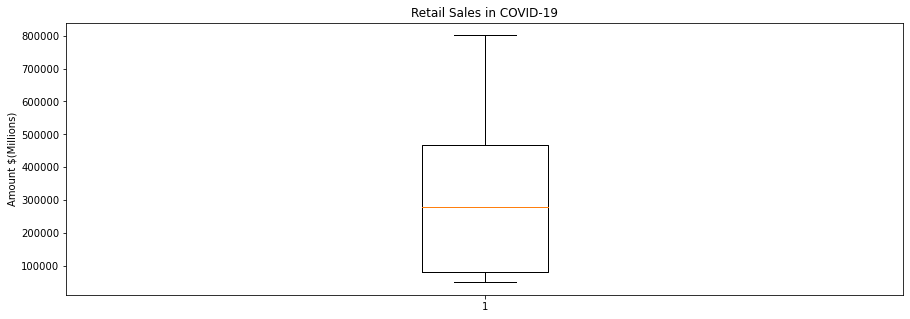

In [75]:
plt.rcParams['figure.figsize'] = [15, 5]
fig1, ax1 = plt.subplots()
ax1.set_title('Retail Sales in COVID-19')
ax1.set_ylabel('Amount $(Millions)')
ax1.boxplot(retail_cat['Amount'])
plt.savefig('retail_covid_box.png')
plt.show()

In [25]:
print("The box plot indicates that there are no outliers in the sales amount")

The box plot indicates that there are no outliers in the sales amount


- Bar chart of Retail Sales Category

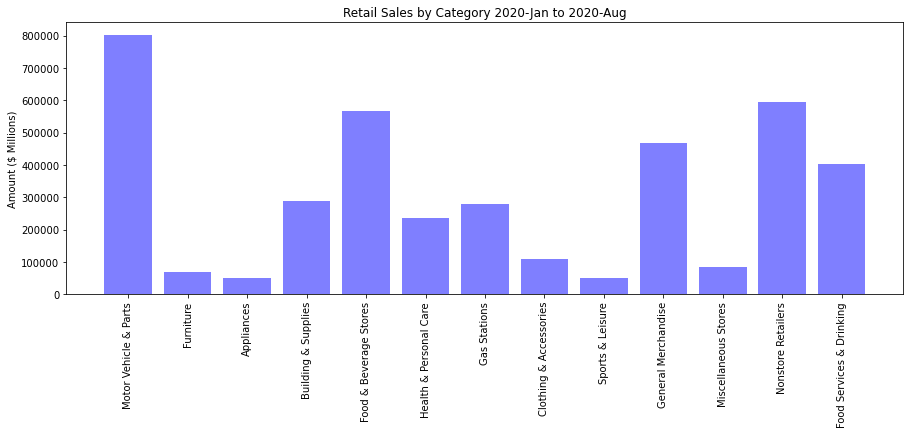

In [26]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(retail_cat['Category'], retail_cat['Amount'], color='b', alpha=0.5, align="center")
plt.ylabel('Amount ($ Millions)')
plt.title('Retail Sales by Category 2020-Jan to 2020-Aug')
plt.xticks(rotation=90)
plt.savefig('retail_category_2020.png')
plt.show()


- Extract top 5 sales by category: **top_5_sales_cat**

In [27]:
top_5_sales_cat = retail_cat.nlargest(5, 'Amount')
top_5_sales_cat

,Category,Amount,Pct Change 2019
0,Motor Vehicle & Parts,801017,-3.4
11,Nonstore Retailers,593921,19.6
4,Food & Beverage Stores,566563,12.2
9,General Merchandise,467022,2.2
12,Food Services & Drinking,403894,-20.9


- Bar chart of **top_5_sales_cat**

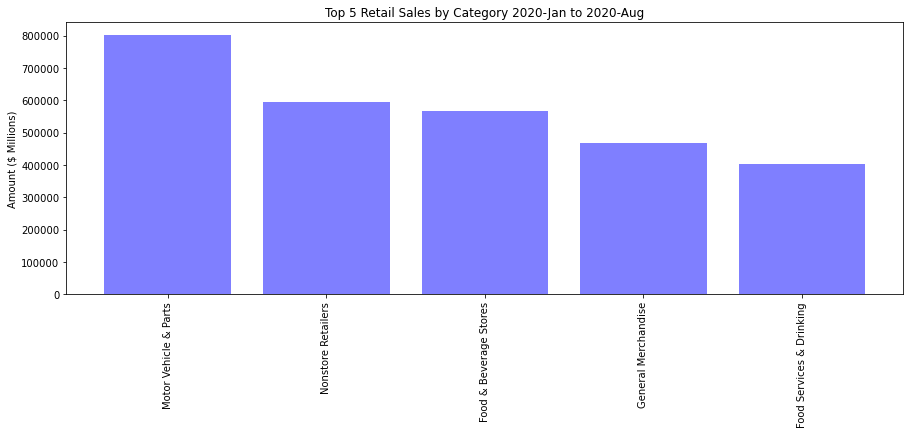

In [28]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(top_5_sales_cat['Category'], top_5_sales_cat['Amount'], color='b', alpha=0.5, align="center")
plt.ylabel('Amount ($ Millions)')
plt.title('Top 5 Retail Sales by Category 2020-Jan to 2020-Aug')
plt.xticks(rotation=90)
plt.savefig('top_5_retail_cat.png')
plt.show()


- Bar chart Retail Sales Percent Change

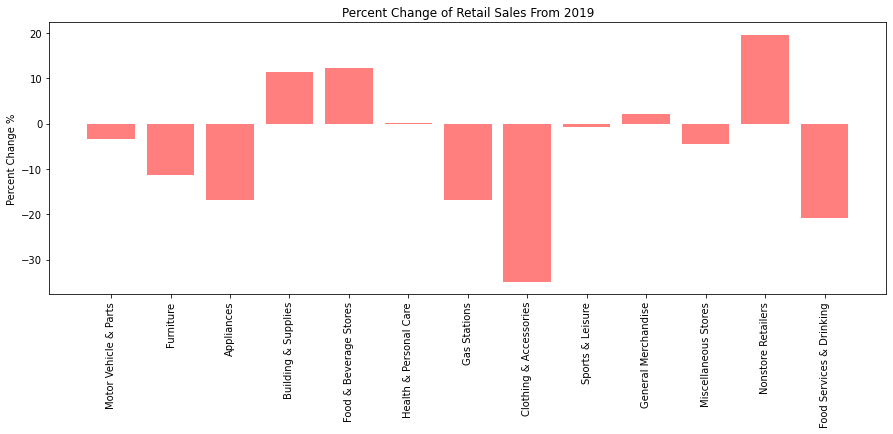

In [29]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(retail_cat['Category'], retail_cat['Pct Change 2019'], color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.ylabel('Percent Change %')
plt.title('Percent Change of Retail Sales From 2019')
plt.savefig('retail_percent_change.png')
plt.show()


- Extract Top 5 Retail Sales Percent Change by Categories: **top_5_pct_change**

In [30]:
top_5_pct_change = retail_cat.nlargest(5, 'Pct Change 2019')
top_5_pct_change

,Category,Amount,Pct Change 2019
11,Nonstore Retailers,593921,19.6
4,Food & Beverage Stores,566563,12.2
3,Building & Supplies,289219,11.4
9,General Merchandise,467022,2.2
5,Health & Personal Care,236769,0.1


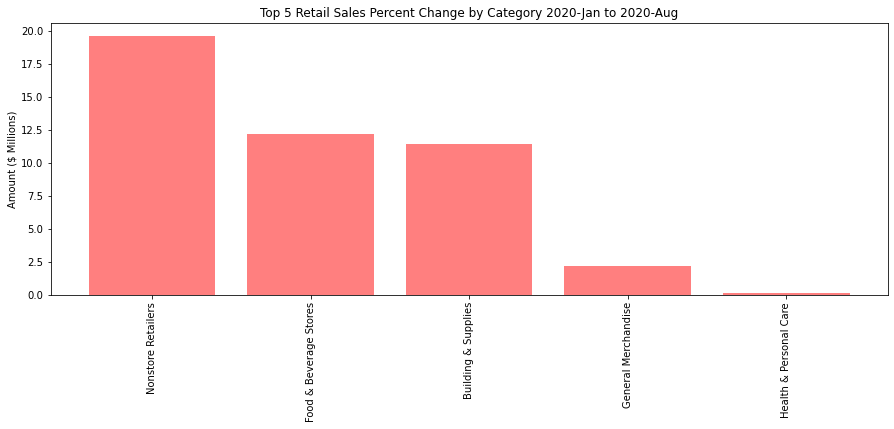

In [31]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(top_5_pct_change['Category'], top_5_pct_change['Pct Change 2019'], color='r', alpha=0.5, align="center")
plt.ylabel('Amount ($ Millions)')
plt.title('Top 5 Retail Sales Percent Change by Category 2020-Jan to 2020-Aug')
plt.xticks(rotation=90)
plt.savefig('top_5_retail_pct_cat.png')
plt.show()


- Bottom 5 Retail Sales Percent Change by category: **bottom_5_pct_change**

In [32]:
bottom_5_pct_change = retail_cat.nsmallest(5, 'Pct Change 2019')
bottom_5_pct_change

,Category,Amount,Pct Change 2019
7,Clothing & Accessories,108616,-34.9
12,Food Services & Drinking,403894,-20.9
6,Gas Stations,277960,-16.9
2,Appliances,49890,-16.8
1,Furniture,67610,-11.3


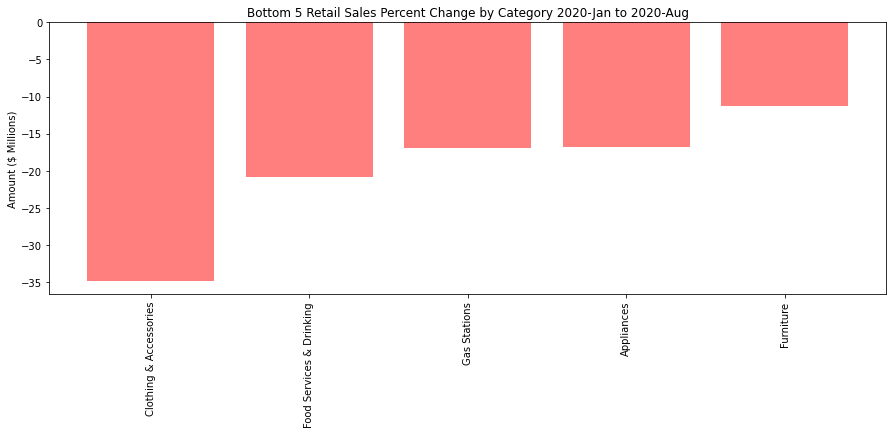

In [33]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(bottom_5_pct_change['Category'], bottom_5_pct_change['Pct Change 2019'], color='r', alpha=0.5, align="center")
plt.ylabel('Amount ($ Millions)')
plt.title('Bottom 5 Retail Sales Percent Change by Category 2020-Jan to 2020-Aug')
plt.xticks(rotation=90)
plt.savefig('bottom_5_retail_pct_cat.png')
plt.show()


## Section 3: **E-Commerce**

- Load e-commerce in data frame: **e_com**
- Inspect column names
- Inspect first 5 rows

In [34]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\e-com-timeseries.txt"
e_com = pd.read_csv(file, sep= "/", header = None)
e_com.columns = ['Quarter', 'Retail Total', 'E_Commerce', 'E_Com_Pct_Total', 'Total_Pct_chnge_prQ', 'E_com_Pct_chnge_prQ',\
                 'Total_Pct_chnge_sameQ', 'E_com_Pct_chnge_sameQ']
e_com.head()

,Quarter,Retail Total,E_Commerce,E_Com_Pct_Total,Total_Pct_chnge_prQ,E_com_Pct_chnge_prQ,Total_Pct_chnge_sameQ,E_com_Pct_chnge_sameQ
0,2nd quarter 2020(p),1310973,211505,16.1,-3.9,31.8,-3.6,44.5
1,1st quarter 2020(r),1364197,160414,11.8,-1.2,2.4,2.1,14.8
2,4th quarter 2019,1381250,156581,11.3,0.5,2.2,3.9,16.6
3,3rd quarter 2019,1374212,153274,11.2,1.1,4.7,3.9,17.3
4,2nd quarter 2019(r),1359250,146394,10.8,1.8,4.8,3.2,13.8


- Inspect data type

In [35]:
e_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Quarter                83 non-null     object 
 1   Retail Total           83 non-null     int64  
 2   E_Commerce             83 non-null     int64  
 3   E_Com_Pct_Total        83 non-null     float64
 4   Total_Pct_chnge_prQ    83 non-null     float64
 5   E_com_Pct_chnge_prQ    82 non-null     float64
 6   Total_Pct_chnge_sameQ  83 non-null     float64
 7   E_com_Pct_chnge_sameQ  79 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 5.3+ KB


- Extract e-commerce sales for the last 5 years: **e_com_5**
- Inspect first 5 rows

In [36]:
# e-coms over 5 year period
e_com_5 = e_com.loc[0:17]
e_com_5.head()

,Quarter,Retail Total,E_Commerce,E_Com_Pct_Total,Total_Pct_chnge_prQ,E_com_Pct_chnge_prQ,Total_Pct_chnge_sameQ,E_com_Pct_chnge_sameQ
0,2nd quarter 2020(p),1310973,211505,16.1,-3.9,31.8,-3.6,44.5
1,1st quarter 2020(r),1364197,160414,11.8,-1.2,2.4,2.1,14.8
2,4th quarter 2019,1381250,156581,11.3,0.5,2.2,3.9,16.6
3,3rd quarter 2019,1374212,153274,11.2,1.1,4.7,3.9,17.3
4,2nd quarter 2019(r),1359250,146394,10.8,1.8,4.8,3.2,13.8


- Create new labels for *Quarters* Column: **e_com_5_labels**

In [37]:
e_com_5_labels = ['Q2_20', 'Q1_20',\
                  'Q4_19', 'Q3_19', 'Q2_19', 'Q1_19',\
                  'Q4_18', 'Q3_18', 'Q2_18', 'Q1_18',\
                  'Q4_17', 'Q3_17', 'Q2_17', 'Q1_17',\
                 'Q4_16', 'Q3_16', 'Q2_16', 'Q1_16']
labels = [label for label in e_com_5_labels]

e_com_5['Quarters'] = labels

C:\Users\lenpk\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- Extract columns for analysis: **new_e_com_5**

In [38]:
new_e_com_5 = e_com_5[['Quarters',  'Retail Total', 'E_Commerce', 'Total_Pct_chnge_sameQ',
       'E_com_Pct_chnge_sameQ']]

**Statistical Analysis of Quarterly E-Commerce Sales**

- Outlier Detection

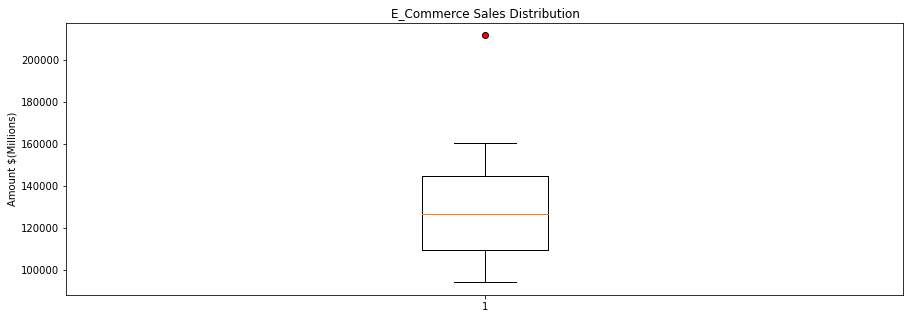

In [76]:
plt.rcParams['figure.figsize'] = [15, 5]
red_circle = dict(markerfacecolor='r', marker='o')
fig1, ax1 = plt.subplots()
ax1.set_title('E_Commerce Sales Distribution')
ax1.set_ylabel('Amount $(Millions)')
ax1.boxplot(new_e_com_5['E_Commerce'], flierprops=red_circle)
plt.savefig('e_com_box.png')
plt.show()

In [40]:
# Determine if there are any potential outliers in E-Commerce Sales
quartiles = new_e_com_5['E_Commerce'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of e-commerce sales is: {lowerq}")
print(f"The upper quartile of e-commerce sales is: {upperq}")
print(f"The interquartile range of e-commerce sales is: {iqr}")
print(f"The the median of e-commerce sales is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_e_commerce = new_e_com_5.loc[(new_e_com_5['E_Commerce'] < lower_bound) | (new_e_com_5['E_Commerce'] > upper_bound)]
outlier_e_commerce

The lower quartile of e-commerce sales is: 109278.75
The upper quartile of e-commerce sales is: 144723.75
The interquartile range of e-commerce sales is: 35445.0
The the median of e-commerce sales is: 126776.0 
Values below 56111.25 could be outliers.
Values above 197891.25 could be outliers.


,Quarters,Retail Total,E_Commerce,Total_Pct_chnge_sameQ,E_com_Pct_chnge_sameQ
0,Q2_20,1310973,211505,-3.6,44.5


In [41]:
print("The outlier data corroborates the single outlier Q2_20 (Second Quarter of 2020)\
displayed in the box and whisker plot.")
print("The outlier reflects the change of bussiness pattern in COVID-19 as more businesses engaged in online sales.")

The outlier data corroborates the single outlier Q2_20 (Second Quarter of 2020)displayed in the box and whisker plot.
The outlier reflects the change of bussiness pattern in COVID-19 as more businesses engaged in online sales.


**Relationship between Total Retail and E-Commerce: Scatter plot**

The r-squared is: 0.5554214475969071
The equation of the line is: y = 1.56x + 1091493.95


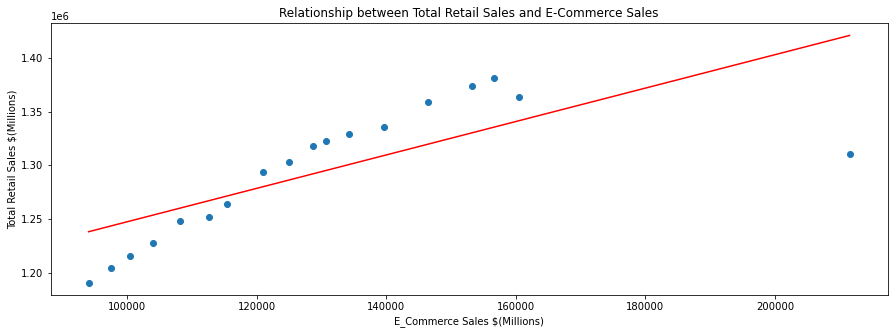

In [77]:
x_values = new_e_com_5['E_Commerce']
y_values = new_e_com_5['Retail Total']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('E_Commerce Sales $(Millions)')
plt.ylabel('Total Retail Sales $(Millions)')
plt.title('Relationship between Total Retail Sales and E-Commerce Sales')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")
plt.savefig('retail_e_com_scatter.png')
plt.show()

In [71]:
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}, suggesting a strong positive relationship")

The correlation between both factors is 0.75, suggesting a strong positive relationship


- Sort **new_e_com_5** in descending order: **sort_e_com_5**

In [43]:
sort_e_com_5 = new_e_com_5.sort_index(ascending=False)
sort_e_com_5

,Quarters,Retail Total,E_Commerce,Total_Pct_chnge_sameQ,E_com_Pct_chnge_sameQ
17,Q1_16,1190699,94057,2.5,14.9
16,Q2_16,1204107,97459,2.0,15.1
15,Q3_16,1215288,100519,2.0,14.5
14,Q4_16,1227505,103952,3.3,14.6
13,Q1_17,1248288,108157,4.8,15.0
12,Q2_17,1251528,112644,3.9,15.6
11,Q3_17,1264307,115419,4.0,14.8
10,Q4_17,1294247,121019,5.4,16.4
9,Q1_18,1302741,124936,4.4,15.5
8,Q2_18,1317610,128616,5.3,14.2


- Bar plot of **sort_e_com_5**

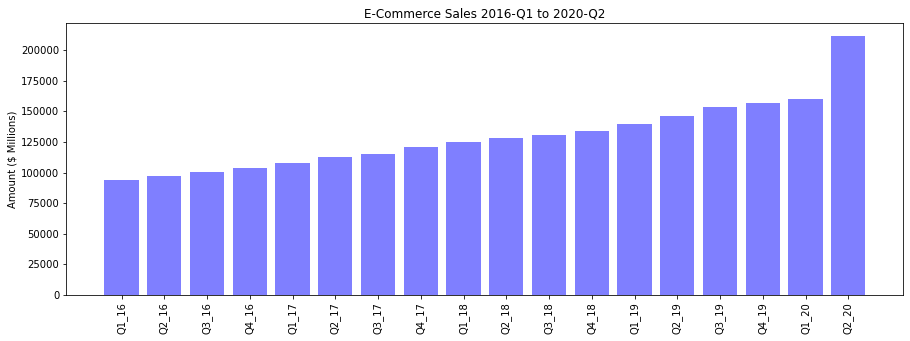

In [44]:
plt.rcParams['figure.figsize'] = [15, 5]
x_axis = sort_e_com_5['Quarters']
y_axis = sort_e_com_5['E_Commerce']
plt.xticks(rotation=90)
plt.title('E-Commerce Sales 2016-Q1 to 2020-Q2')
plt.ylabel('Amount ($ Millions)')
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.savefig('e_com_sales_16to20.png')
plt.show()


- Line plot of Retail vs E-Commerce

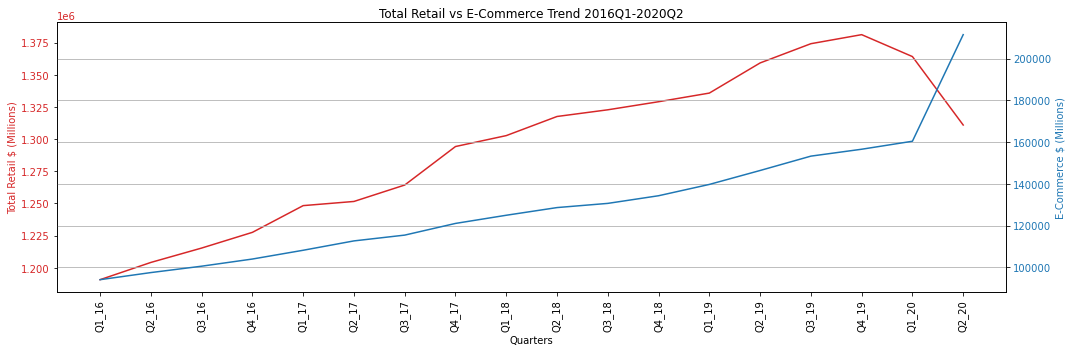

In [45]:
plt.rcParams['figure.figsize'] = [15, 5]
labs = sort_e_com_5['Quarters']
t = [x for x in labs]
data1 = sort_e_com_5['Retail Total']
data2 = sort_e_com_5['E_Commerce']

# labels = t
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Quarters')
ax1.set_ylabel('Total Retail $ (Millions)', color=color)
plt.xticks(rotation=90)
plt.title('Total Retail vs E-Commerce Trend 2016Q1-2020Q2')
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)



ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('E-Commerce $ (Millions)', color=color) 
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.grid()
plt.savefig('retail_ecom_16to20.png')
plt.show()


- Bar Chart of Retail Percent Change by quarter

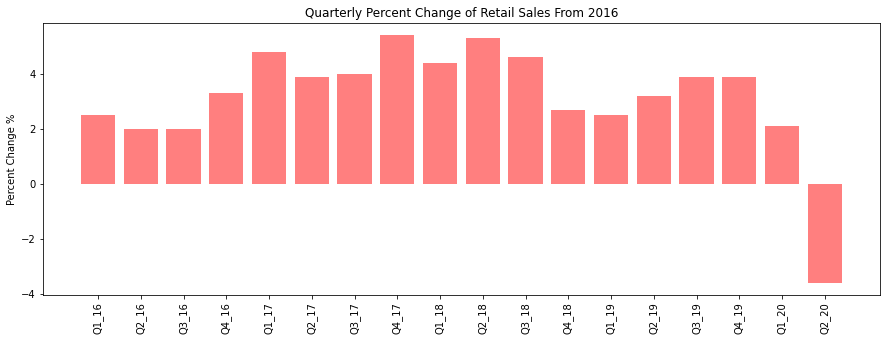

In [46]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(sort_e_com_5['Quarters'], sort_e_com_5['Total_Pct_chnge_sameQ'], color='r', alpha=0.5, align="center")

plt.xticks(rotation=90)
plt.ylabel('Percent Change %')
plt.title('Quarterly Percent Change of Retail Sales From 2016')
plt.savefig('retail_percent_chnge.png')
plt.show()


- Bar chart of E-Commerce Quarterly Percent change

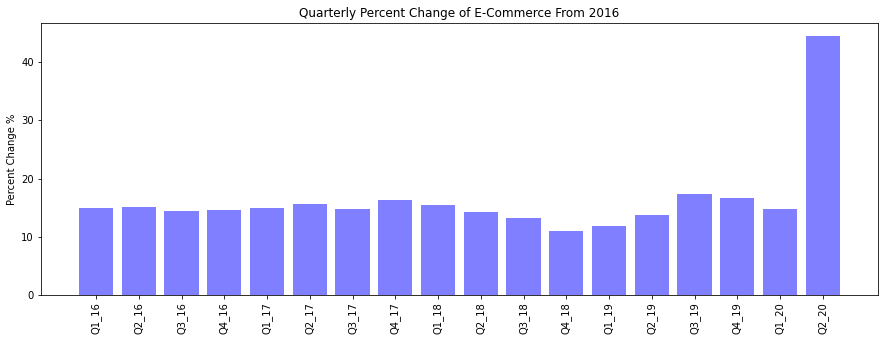

In [47]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(sort_e_com_5['Quarters'], sort_e_com_5['E_com_Pct_chnge_sameQ'], color='b', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.ylabel('Percent Change %')
plt.title('Quarterly Percent Change of E-Commerce From 2016')
plt.savefig('e_com_percent_chnge.png')
plt.show()


## Section 4: **Retail Grocery**

- Read file in data frame: **retail_grocery**

In [48]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\retail_grocery.csv"
retail_grocery = pd.read_csv(file)
retail_grocery.head()

,DATE,RSGCS_20200814,RSGCS_20200916
0,2010-01-01,43028,43028
1,2010-02-01,43735,43735
2,2010-03-01,43304,43304
3,2010-04-01,43186,43186
4,2010-05-01,43266,43266


- Inspect **retail_grocery**

In [49]:
retail_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            128 non-null    object
 1   RSGCS_20200814  128 non-null    object
 2   RSGCS_20200916  128 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


- Drop column RSGCS_20200814 for **retail_grocery_sept**
- Inspect first 5 rows

In [50]:
retail_grocery_sept = retail_grocery.drop(['RSGCS_20200814'], axis = 1)
retail_grocery_sept.head()

,DATE,RSGCS_20200916
0,2010-01-01,43028
1,2010-02-01,43735
2,2010-03-01,43304
3,2010-04-01,43186
4,2010-05-01,43266


- Convert 'RSGCS_20200916' to integer
- Convert DATE to date time object

In [51]:
retail_grocery_sept['RSGCS_20200916'] = retail_grocery_sept['RSGCS_20200916'].astype(int)

retail_grocery_sept['DATE'] = pd.to_datetime(retail_grocery_sept['DATE'])

- Rename RSGCS_20200916 to Amount
- Inspect to confirm data type

In [52]:
retail_grocery_sept.rename(columns = {'RSGCS_20200916':'Amount'}, inplace=True)
retail_grocery_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    128 non-null    datetime64[ns]
 1   Amount  128 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.6 KB


In [53]:
retail_grocery_sept.head()

,DATE,Amount
0,2010-01-01,43028
1,2010-02-01,43735
2,2010-03-01,43304
3,2010-04-01,43186
4,2010-05-01,43266


**Retail Grocery Statistics**

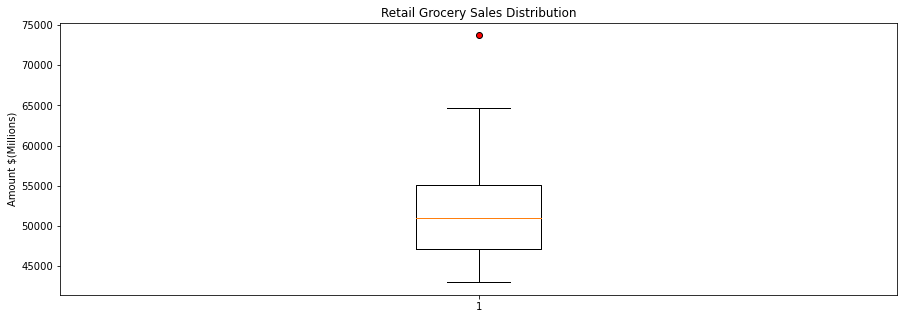

In [78]:
plt.rcParams['figure.figsize'] = [15, 5]
red_circle = dict(markerfacecolor='r', marker='o')
fig1, ax1 = plt.subplots()
ax1.set_title('Retail Grocery Sales Distribution')
ax1.set_ylabel('Amount $(Millions)')
ax1.boxplot(retail_grocery_sept['Amount'], flierprops=red_circle)
plt.savefig('retail_grocery_box.png')
plt.show()

In [55]:
# Determine if there are any potential outliers in the in Retail Grocery Sales
quartiles = retail_grocery_sept['Amount'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Retail grocery sales is: {lowerq}")
print(f"The upper quartile of Retail grocery sales is: {upperq}")
print(f"The interquartile range of Retail grocery sales is: {iqr}")
print(f"The the median of Retail grocery sales is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_retail_grocery = retail_grocery_sept.loc[(retail_grocery_sept['Amount'] < lower_bound) |\
                                                 (retail_grocery_sept['Amount'] > upper_bound)]
outlier_retail_grocery

The lower quartile of Retail grocery sales is: 47076.0
The upper quartile of Retail grocery sales is: 55035.0
The interquartile range of Retail grocery sales is: 7959.0
The the median of Retail grocery sales is: 50976.5 
Values below 35137.5 could be outliers.
Values above 66973.5 could be outliers.


,DATE,Amount
122,2020-03-01,73714


In [56]:
print("The outlier data corroborates the single outlier (2020-March) displayed in the box and whisker plot.")
print("The outlier reflects the demand for food items in the wake of COVID-19 and the announcement of lockdown measures.")

The outlier data corroborates the single outlier (2020-March) displayed in the box and whisker plot.
The outlier reflects the demand for food items in the wake of COVID-19 and the announcement of lockdown measures.


- Line chart of Annual Retail Grocery Sales

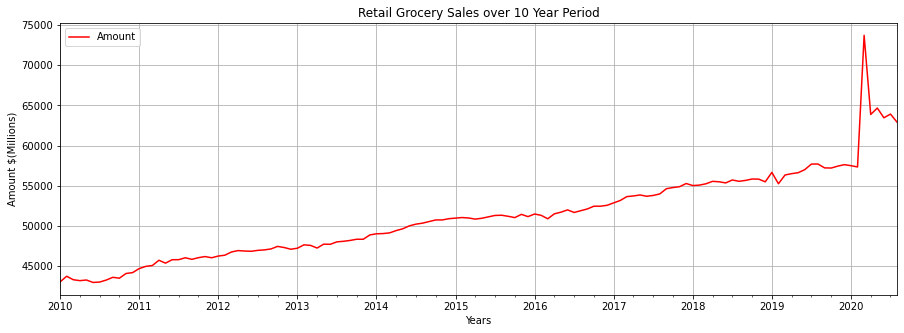

In [57]:
plt.rcParams['figure.figsize'] = [15, 5]
retail_grocery_sept.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Years')
plt.ylabel('Amount $(Millions)')
plt.title('Retail Grocery Sales over 10 Year Period')
plt.grid()
plt.savefig('retail_grocery_line.png')
plt.show()


**Retail grocery Y2020**
- Extract data for January 2020 to August 2020

In [58]:
# select 2020 data
retail_grocery_y20 = retail_grocery_sept.loc[120:]
retail_grocery_y20

,DATE,Amount
120,2020-01-01,57495
121,2020-02-01,57337
122,2020-03-01,73714
123,2020-04-01,63869
124,2020-05-01,64667
125,2020-06-01,63454
126,2020-07-01,63916
127,2020-08-01,62905


**Relationship between Retail Grocery and COVID-19 Cases**

The r-squared is: 0.020251635732703478
The equation of the line is: y = 0.0x + 62634.15


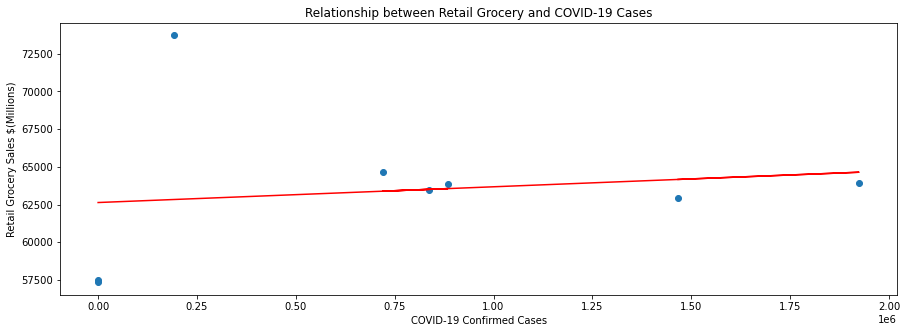

In [79]:
x = state
y = retail_grocery_y20['Amount']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")

plt.xlabel('COVID-19 Confirmed Cases')
plt.ylabel('Retail Grocery Sales $(Millions)')
plt.title('Relationship between Retail Grocery and COVID-19 Cases')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")
plt.savefig('retail_grocery_covid_scatter.png')
plt.show()

In [72]:
correlation = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}, which indicates a weak positive relationship.")

The correlation between both factors is 0.14, which indicates a weak positive relationship.


- Line chart of Retail Grocery in Y2020 (COVID-19)

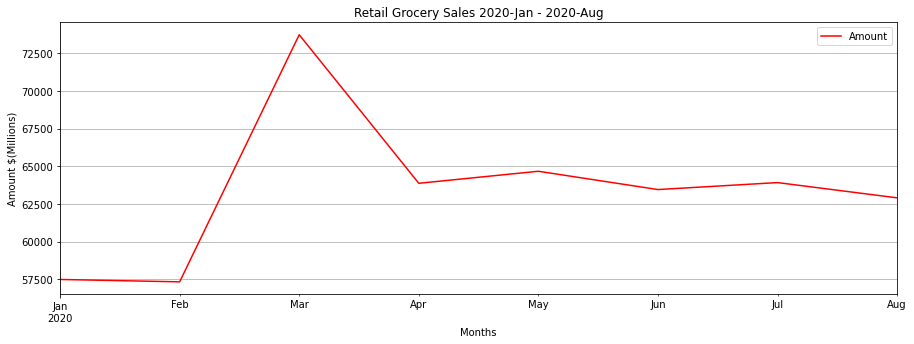

In [60]:
plt.rcParams['figure.figsize'] = [15, 5]
retail_grocery_y20.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Months')
plt.ylabel('Amount $(Millions)')
plt.title('Retail Grocery Sales 2020-Jan - 2020-Aug')
plt.grid()
plt.savefig('retail_grocery_line_y20.png')
plt.show()


### **Retail Grocery vs COVID-19 Line Chart**

- Line chart of Retail Grocery Sales and COVID-19 confirmed cases

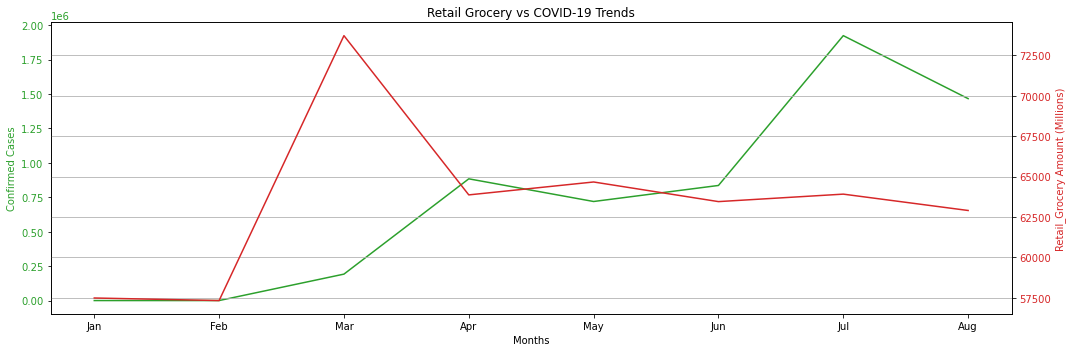

In [61]:
plt.rcParams['figure.figsize'] = [15, 5]
t = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
data1 = state
data2 =retail_grocery_y20['Amount']

fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Months')
ax1.set_ylabel('Confirmed Cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title('Retail Grocery vs COVID-19 Trends')


ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Retail_Grocery Amount (Millions)', color=color) 
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.grid()
plt.savefig('retail_grocery_covid.png')
plt.show()


## Section 5: **E-Grocery Sales**

**Source:** Brick Meets Clicks (BMC)/Mercatus Grocery Shopping Survey 

- Create data frame of e-grocery sales data: **e_grocery_2020**

In [62]:
# e-grocery March, April, May, June, and August
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug'] 
Amount= [4000, 5300, 6600, 7200, 5700]


e_grocery_2020 = pd.DataFrame({'DATE': labels,
                              'Amount': Amount})
e_grocery_2020

,DATE,Amount
0,Mar,4000
1,Apr,5300
2,May,6600
3,Jun,7200
4,Aug,5700


- Bar Chart of e-grocery_2020

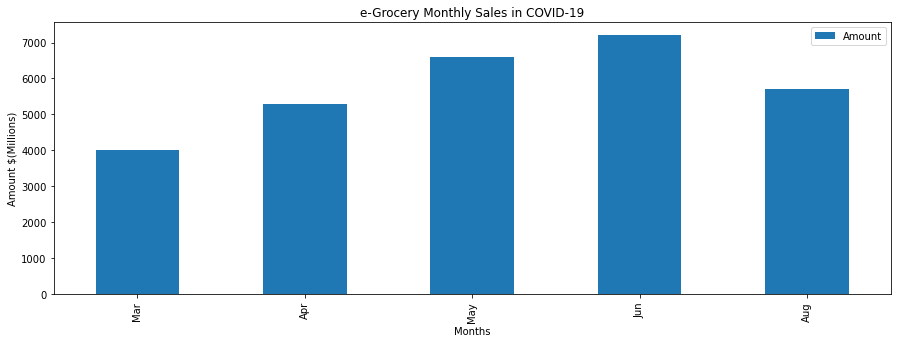

In [63]:
plt.rcParams['figure.figsize'] = [15, 5]
e_grocery_2020.plot(kind='bar', x='DATE', y='Amount')
plt.xlabel('Months')
plt.ylabel('Amount $(Millions)')
plt.title('e-Grocery Monthly Sales in COVID-19')
plt.savefig('e_grocery_y20.png')
plt.show()


**Retail Grocery Sales vs e-Grocery Sales**

**Note:** Comparison is done between the same corresponding month in each data set due to the limitations of obtaining data for the months of January, February and July.

- Extract data from **retail_grocery_y20** to compare with **e_grocery_2020**
- Drop January, February and July

In [64]:
# Extract retail grocery data corresponding to the months in e-grocery_2020
rem_months = retail_grocery_y20[(retail_grocery_y20['DATE']=='2020-01-01') |\
                                                                  (retail_grocery_y20['DATE']=='2020-02-01') |\
                                                                  (retail_grocery_y20['DATE']=='2020-07-01')].index
retail_grocery_covid = retail_grocery_y20.drop(rem_months).reset_index(drop = True)

- Drop DATE column
- Insert Months column from to have month labels: **retail_covid_months**

In [65]:
retail_covid_months = retail_grocery_covid.drop(['DATE'], axis = 1)
retail_covid_months['Months'] = [label for label in labels]
retail_covid_months.rename(columns={'Months':'DATE'}, inplace = True)
retail_covid_months

,Amount,DATE
0,73714,Mar
1,63869,Apr
2,64667,May
3,63454,Jun
4,62905,Aug


- Merge data frames: **merged_grocery**

In [66]:
merged_grocery = pd.merge(e_grocery_2020, retail_covid_months, on='DATE', suffixes=("_e_Grocery", "_Retail_Grocery"))
merged_grocery

,DATE,Amount_e_Grocery,Amount_Retail_Grocery
0,Mar,4000,73714
1,Apr,5300,63869
2,May,6600,64667
3,Jun,7200,63454
4,Aug,5700,62905


- Plot side-by-side barcharts of **e_grocery** and **retail_grocery**

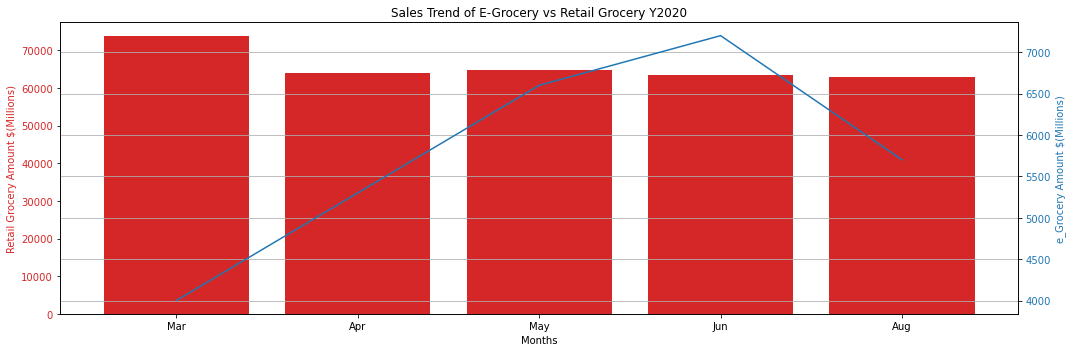

In [67]:
plt.rcParams['figure.figsize'] = [15, 5]
t = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
data1 = retail_covid_months['Amount']
data2 = e_grocery_2020['Amount']
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Retail Grocery Amount $(Millions)', color=color)
ax1.bar(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('e_Grocery Amount $(Millions)', color=color) 
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sales Trend of E-Grocery vs Retail Grocery Y2020')
fig.tight_layout() 
plt.grid()
plt.savefig('retail_e_grocery_line_bar.png')
plt.show()

**E-Grocery vs Retail Grocery in Covid-19**

- Create line charts to compare difference in trends between e_grocery and retail grocery

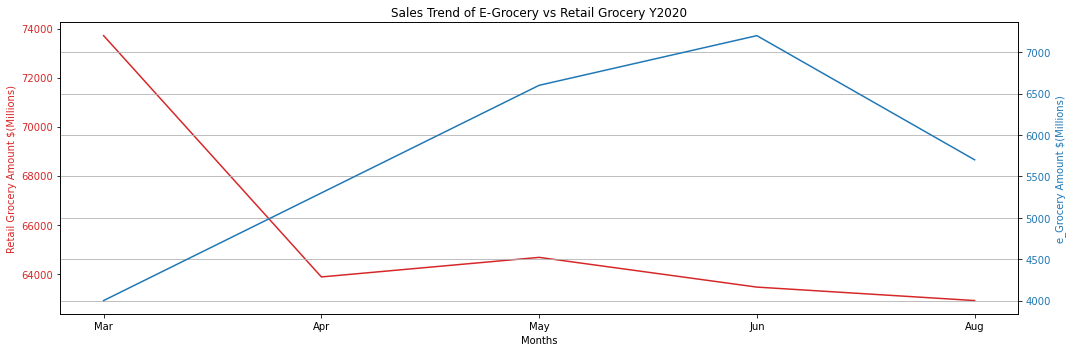

In [68]:
plt.rcParams['figure.figsize'] = [15, 5]
t = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
data1 = retail_covid_months['Amount']
data2 = e_grocery_2020['Amount']
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Retail Grocery Amount $(Millions)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('e_Grocery Amount $(Millions)', color=color) 
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sales Trend of E-Grocery vs Retail Grocery Y2020')
fig.tight_layout() 
plt.grid()
plt.savefig('retail_e_grocery_line.png')
plt.show()


**E-Grocery vs COVID-19**

- Extract covid-19 months corresponding to months in e_grocery: **state_for_e_grocery**

In [69]:
state_for_egrocery = state.drop(['Jan', 'Feb', 'Jul'], axis = 0)
state_for_egrocery

Mar     192023
Apr     884275
May     719593
Jun     836056
Aug    1466741
dtype: int64

- Create line charts to compare difference in trends between e_grocery and covid-19 cases

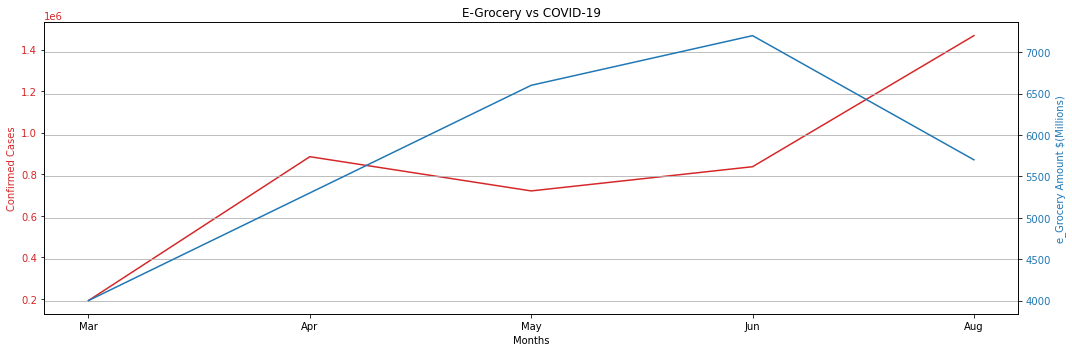

In [70]:
plt.rcParams['figure.figsize'] = [15, 5]
t = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
data1 = state_for_egrocery
data2 = e_grocery_2020['Amount']
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Confirmed Cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)



ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('e_Grocery Amount $(Millions)', color=color) 
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('E-Grocery vs COVID-19')
fig.tight_layout() 
plt.grid()
plt.savefig('e_grocery_covid_line.png')
plt.show()


The r-squared is: 0.18891574287536925
The equation of the line is: y = 0.0x + 4793.04


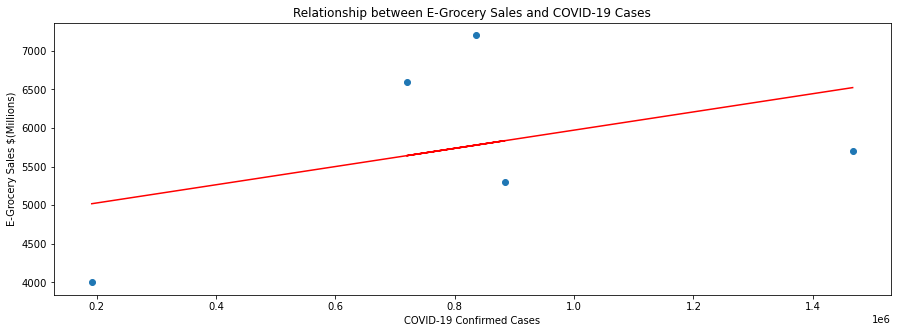

In [80]:
x_1 = state_for_egrocery
y_1 = e_grocery_2020['Amount']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_1, y_1)
plt.plot(x_1,regress_values,"r-")

plt.xlabel('COVID-19 Confirmed Cases')
plt.ylabel('E-Grocery Sales $(Millions)')
plt.title('Relationship between E-Grocery Sales and COVID-19 Cases')
print(f"The r-squared is: {rvalue**2}")
print(f"The equation of the line is: {line_eq}")
plt.savefig('e_grocery_covid_scatter.png')
plt.show()

In [73]:
correlation = st.pearsonr(x_1, y_1)
print(f"The correlation between both factors is {round(correlation[0],2)}, suggesting a weak positive relationship.")

The correlation between both factors is 0.43, suggesting a weak positive relationship.
